<a href="https://colab.research.google.com/github/Asha-Gutlapalli/Drug-Recommendation-System-based-on-the-Condition-of-the-Patient-using-BERT/blob/master/Discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [77]:
import os
import tensorflow as tf
import math
import numpy as np
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
%matplotlib inline

# **Data Preprocessing and Feature Engineering**

In [ ]:
DataAug = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, rescale = 1.0 / 255., shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
DataGen = ImageDataGenerator(rescale = 1.0 / 255.)

ImgSize = 224
BatchSize = 10

TrainGen = DataAug.flow_from_directory('/content/drive/My Drive/Discriminator Dataset/Train', target_size = (ImgSize, ImgSize), batch_size = BatchSize, class_mode = 'categorical')
TestGen = DataGen.flow_from_directory('/content/drive/My Drive/Discriminator Dataset/Valid', target_size = (ImgSize, ImgSize), batch_size = BatchSize, class_mode = 'categorical')
TestGen = DataGen.flow_from_directory('/content/drive/My Drive/Discriminator Dataset/Test', target_size = (ImgSize, ImgSize), batch_size = BatchSize, class_mode = 'categorical')

Found 3784 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


# **Model**

In [ ]:
resnet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

mod = Sequential()
mod.add(resnet_model)
mod.add(GlobalAveragePooling2D())
mod.add(Dropout(.25))
mod.add(Dense(2, activation='softmax'))

9412608/9406464 [==============================] - 0s 0us/step


# **Compilation**

In [ ]:
mod.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# **Training and Validation**

In [ ]:
history = mod.fit(TrainGen, epochs = 50, verbose = 1, validation_data = TestGen)

Epoch 1/50
379/379 [==============================] - 54s 142ms/step - loss: 0.6892 - accuracy: 0.5776 - val_loss: 0.6765 - val_accuracy: 0.6000
Epoch 2/50
379/379 [==============================] - 54s 142ms/step - loss: 0.6879 - accuracy: 0.5776 - val_loss: 0.6747 - val_accuracy: 0.6000
Epoch 3/50
379/379 [==============================] - 53s 140ms/step - loss: 0.6875 - accuracy: 0.5770 - val_loss: 0.6756 - val_accuracy: 0.6000
Epoch 4/50
379/379 [==============================] - 53s 140ms/step - loss: 0.6812 - accuracy: 0.5823 - val_loss: 0.6822 - val_accuracy: 0.6000
Epoch 5/50
379/379 [==============================] - 53s 141ms/step - loss: 0.6823 - accuracy: 0.5807 - val_loss: 0.6750 - val_accuracy: 0.6000
Epoch 6/50
379/379 [==============================] - 53s 140ms/step - loss: 0.6825 - accuracy: 0.5839 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 7/50
379/379 [==============================] - 53s 140ms/step - loss: 0.6840 - accuracy: 0.5831 - val_loss: 0.6735 - val_ac

# **Testing**

Predicted Class: Non-Synthetic
True Class: Synthetic


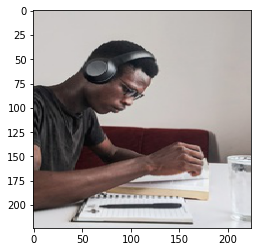

Predicted Class: Non-Synthetic
True Class: Non-Synthetic


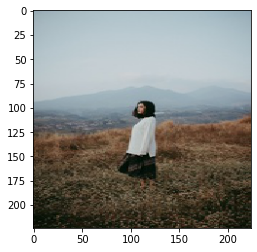

Predicted Class: Non-Synthetic
True Class: Synthetic


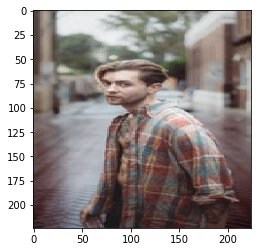

Predicted Class: Non-Synthetic
True Class: Non-Synthetic


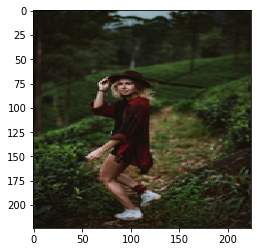

Predicted Class: Non-Synthetic
True Class: Non-Synthetic


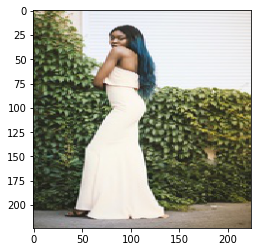

Predicted Class: Non-Synthetic
True Class: Synthetic


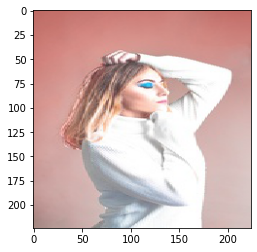

In [108]:
labels = {0 : 'Non-Synthetic', 1 : 'Synthetic'}
pred = mod.predict(TestGen)
pred = pred.argmax(axis = -1)

for i in range(len(TestGen)):
  true = TestGen[i][1].argmax(axis = -1)
  for j in range(len(TestGen[i][0])):
    print('Predicted Class:', labels[pred[j]])
    print('True Class:', labels[true[j]])
    plt.imshow(TestGen[i][0][j])
    plt.show()


# **Performance**

### **Accuracy**

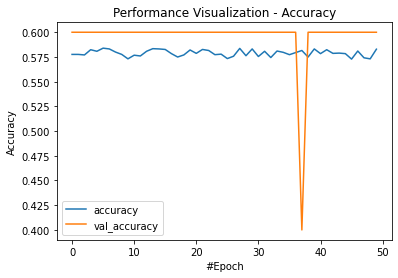

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('#Epoch')
plt.ylabel('Accuracy')
plt.title('Performance Visualization - Accuracy')
plt.show()

### **Loss**

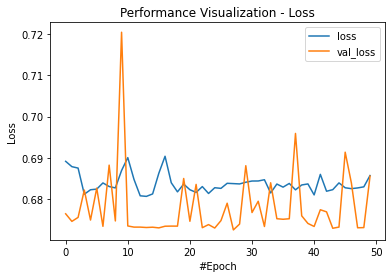

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('#Epoch')
plt.ylabel('Loss')
plt.title('Performance Visualization - Loss')
plt.show()